In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [2]:
suv_data = pd.read_csv("SUV_Purchase.csv")
suv_data.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
suv_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

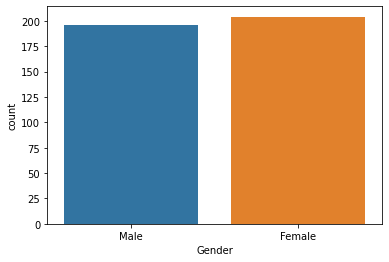

In [6]:
sns.countplot(x="Gender", data = suv_data)


<AxesSubplot:xlabel='Age', ylabel='count'>

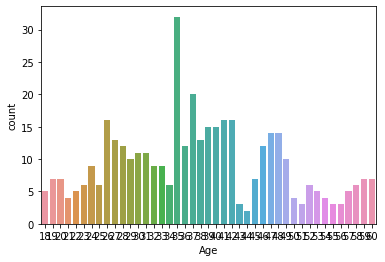

In [7]:
sns.countplot(x="Age", data = suv_data)

<AxesSubplot:>

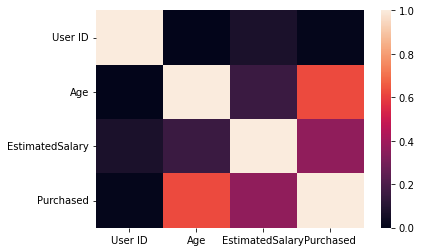

In [8]:
sns.heatmap(suv_data.corr())

In [9]:
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [10]:
suv_map = {
    "Male":1,
    "Female":2
}
suv_data["Gender"]=suv_data["Gender"].map(suv_map)
print(suv_data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       2   26            43000          0
3    15603246       2   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       2   46            41000          1
396  15706071       1   51            23000          1
397  15654296       2   50            20000          1
398  15755018       1   36            33000          0
399  15594041       2   49            36000          1

[400 rows x 5 columns]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error

In [12]:
# y = suv_data.iloc[:,-1]
# X = suv_data.drop(["Purchased"])
# print(y)
# print(X)
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0


In [13]:
X = suv_data.iloc[:,: -1]
y = suv_data.iloc[:,-1]
print(X,y)

      User ID  Gender  Age  EstimatedSalary
0    15624510       1   19            19000
1    15810944       1   35            20000
2    15668575       2   26            43000
3    15603246       2   27            57000
4    15804002       1   19            76000
..        ...     ...  ...              ...
395  15691863       2   46            41000
396  15706071       1   51            23000
397  15654296       2   50            20000
398  15755018       1   36            33000
399  15594041       2   49            36000

[400 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
y_train.head(10)

(266, 4)
(134, 4)
(134,)
(266,)


218    0
101    0
311    1
194    0
326    0
17     1
164    0
186    0
30     0
114    0
Name: Purchased, dtype: int64

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
predictions = model.predict(X_test)


In [30]:
print(predictions)
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1]
132    0
309    0
341    0
196    0
246    0
      ..
168    1
150    0
393    1
66     0
240    1
Name: Purchased, Length: 134, dtype: int64
